In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt    
import seaborn as sns    
import re   
import os   
import warnings
warnings.filterwarnings("ignore")
from preprocess import *
import streamlit as st
from stats import *
from wordcloud import *
import emoji

#### Counting Parameters

In [2]:
file_name = "WhatsApp Chat with CodeAcuity.txt"
user = "Overall"

df = preprocess(file_name=file_name)
df_no_groups = df[df["User"]!="Group Notification"]
list_of_users = np.sort(df_no_groups["User"].unique())

user_messages = {}
user_messages["Overall"] = df_no_groups["Message"].values
for i in list_of_users:
    user_messages[i] = df_no_groups[df_no_groups["User"]==i]["Message"].values
    
list_of_users = list(user_messages.keys())

counting_parameters = retrieve_all_counting_parameters(user_messages,user)

#### Most Busy Users

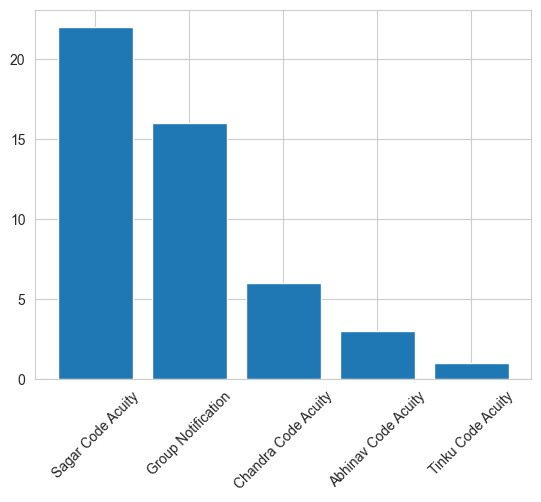

In [3]:
ax,df_user_counts = return_busy_users(file_name=file_name,df=df)

plt.savefig("amith.png")

#### WordCloud

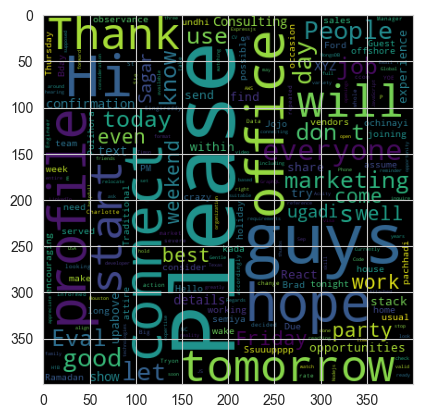

In [4]:
messages = user_messages[user]
        
total_messages = len(messages)
        
words_5 = ""
for i in messages:
    words_5 += (i + " ")
        
words_4 = re.sub(pattern="(https://\S+\s+)",repl="",string=words_5)
words_3 = re.sub(pattern="(<Media omitted>)",repl="",string=words_4)
words_2 = re.sub(pattern="(<This message was edited>)",repl="",string=words_3)
words_11 = words_2.replace("\n", " ")
words_1 = words_11.replace(".","")
words = words_1.split(" ")

while "" in words:
    words.remove("")

text = ""
for i in words:
    text += (i + " ")
    
wc = WordCloud(width=400,height=400,margin=4,random_state=np.random.randint(0,1000))
word_cloud = wc.generate(text)
ax = plt.figure()
plt.imshow(word_cloud)

#### Most common words

Text(0, 0.5, 'Words ------>')

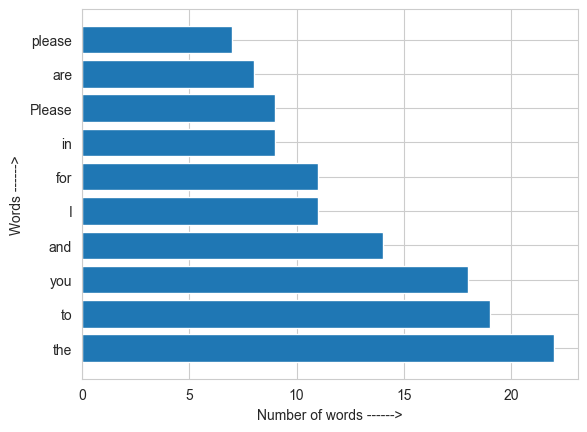

In [5]:
messages = user_messages[user]
        
total_messages = len(messages)
        
words_5 = ""
for i in messages:
    words_5 += (i + " ")
        
words_4 = re.sub(pattern="(https://\S+\s+)",repl="",string=words_5)
words_3 = re.sub(pattern="(<Media omitted>)",repl="",string=words_4)
words_2 = re.sub(pattern="(<This message was edited>)",repl="",string=words_3)
words_11 = words_2.replace("\n", " ")
words_1 = words_11.replace(".","")
words = words_1.split(" ")

while "" in words:
    words.remove("")

words_series = pd.Series(words)
words_count = pd.DataFrame(words_series.value_counts()).reset_index()
words_count = words_count.sort_values(by="count",ascending=False)
words_count_10 = words_count.head(10)


ax1 = plt.figure()
plt.barh(y=words_count_10["index"],width=words_count_10["count"])
plt.xlabel("Number of words ------>")
plt.ylabel("Words ------>")



#### Emoji Analysis

In [6]:
messages = user_messages[user]
        
total_messages = len(messages)

words_5 = ""
for i in messages:
    words_5 += (i + " ")
        
words_4 = re.sub(pattern="(https://\S+\s+)",repl="",string=words_5)
words_3 = re.sub(pattern="(<Media omitted>)",repl="",string=words_4)
words_2 = re.sub(pattern="(<This message was edited>)",repl="",string=words_3)
words_11 = words_2.replace("\n", " ")
words_1 = words_11.replace(".","")
words = words_1.split(" ")

while "" in words:
    words.remove("")

text = ""
for i in words:
    text += (i + " ")

list_of_emojis = []
for i in emoji.EMOJI_DATA:
    list_of_emojis.append(i)
list_of_emojis = np.array(list_of_emojis)

emojis = []

for i in text:
    if i in list_of_emojis:
        emojis.append(i)

emojis = pd.DataFrame(emojis)
emojis_count = pd.DataFrame(emojis.value_counts()).reset_index()
emojis_count.columns = ["Emoji","Count"]

emojis_count_percentage = emojis_count.copy()
emojis_count_percentage["Percentage Use"] = emojis_count_percentage["Count"] * 100 / emojis_count_percentage["Count"].sum()

#### Monthly Timeline

Text(0, 0.5, 'Number of words ------>')

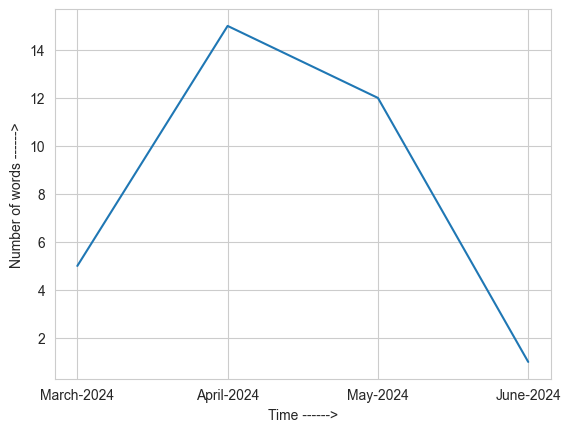

In [7]:
def retrieve_monthly_timeline(df_no_groups,user):
    dates_and_users = df_no_groups[["Only Date","User"]].reset_index(drop=True)
    if user=="Overall":
        dates = df_no_groups["Only Date"].values
    else:
        dates = df_no_groups[df_no_groups["User"]==user]["Only Date"].values
    return dates

k = "Overall"
dates = retrieve_monthly_timeline(df_no_groups,k)
date_count = pd.DataFrame(columns=["Date"])
date_count["Date"] = dates

date_count["Date"] = pd.to_datetime(date_count["Date"])
date_count = date_count.sort_values(by=["Date"])
date_count["Month"] = date_count["Date"].dt.month
date_count["Year"] = date_count["Date"].dt.year
date_count = date_count[["Month","Year"]]
#date_count.columns = ["Date","Count"]

#ax_5 = plt.figure()
#plt.plot(["index"],ax_5["count"])
date_count = pd.DataFrame(date_count.value_counts()).reset_index()

date_count = date_count.sort_values(by=["Month","Year"]).reset_index(drop=True)
date_count = date_count.astype("int64")

date_count["Month"] = date_count["Month"].map({
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
})

date_count["Date"] = list(map(lambda x,y: x+"-"+str(y),date_count["Month"],date_count["Year"]))
date_count = date_count[["Date","count"]]

ax_5 = plt.figure()
plt.plot(date_count["Date"],date_count["count"])
plt.xlabel("Time ------>")
plt.ylabel("Number of words ------>")


#### Activity Maps

In [43]:
def retrieve_activity_maps(df_no_groups,user):
    if user == "Overall":
        df_month_dayname = df_no_groups.copy()
    else:
        df_month_dayname = df_no_groups[df_no_groups["User"]==user].reset_index(drop=True)
    
    df_month_dayname = df_month_dayname[["Month","Day Name"]]
    
    list_of_months = {
        "January":0,
        "February":0,
        "March":0,
        "April":0,
        "May":0,
        "June":0,
        "July":0,
        "August":0,
        "September":0,
        "October":0,
        "November":0,
        "December":0
    }
    list_of_daynames = {
        "Sunday":0,
        "Monday":0,
        "Tuesday":0,
        "Wednesday":0,
        "Thursday":0,
        "Friday":0,
        "Saturday":0
    }
    
    for i in list_of_months:
        mon = df_month_dayname["Month"][df_month_dayname["Month"] == i].count()
        list_of_months[i] = mon
    
    for i in list_of_daynames:
        dayname = df_month_dayname["Day Name"][df_month_dayname["Day Name"] == i].count()
        list_of_daynames[i] = dayname
    
    list_of_months = pd.Series(list_of_months).reset_index()
    list_of_months.columns = ["Month","Number of Messages"]
    list_of_daynames = pd.Series(list_of_daynames).reset_index()
    list_of_daynames.columns = ["Week Day","Number of Messages"]
    
    ax_7 = plt.figure()
    plt.bar(x=list_of_months["Month"],height=list_of_months["Number of Messages"],color="green")
    plt.xlabel("Month ------>")
    plt.ylabel("Number of Messages ------>")
    plt.xticks(rotation=45)
    
    ax_8 = plt.figure()
    plt.bar(x=list_of_daynames["Week Day"],height=list_of_daynames["Number of Messages"],color="purple")
    plt.xlabel("Week Day ------>")
    plt.ylabel("Number of Messages ------>")
    plt.xticks(rotation=45)
    
    return ax_7,ax_8

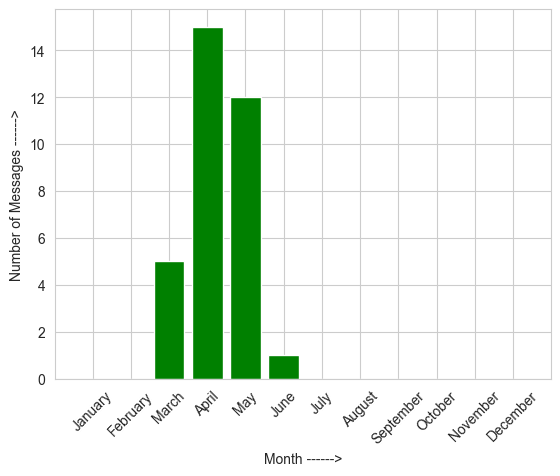

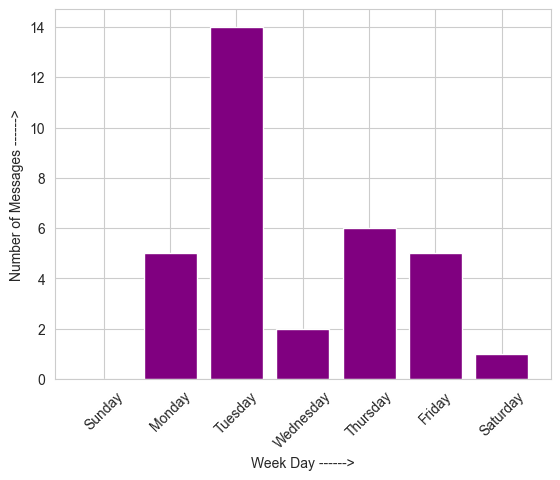

In [44]:
axr,axs = retrieve_activity_maps(df_no_groups,"Overall")